In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
data = pd.read_csv("dataset/historical_data.csv")
data.shape

(197428, 16)

In [4]:
df = data.copy()
df.shape

(197428, 16)

In [5]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

*`created_at` and `actual_delivery_time`  are object type. Lets convert them to DateTime format* 


In [7]:
print(df["actual_delivery_time"].dtype)


object


In [8]:
print(f"before conversion : {df['created_at'].dtype}")
df["created_at"] = pd.to_datetime(df["created_at"])
print(df["created_at"].dtype)
print(f" before conversion : {df['actual_delivery_time'].dtype}")
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
print(df["actual_delivery_time"].dtype)

before conversion : object
datetime64[ns]
 before conversion : object
datetime64[ns]


In [9]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,2956,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,2956,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,2956,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,3630,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [10]:
df.select_dtypes("object").nunique()

store_primary_category    74
dtype: int64

In [11]:
df.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
store_primary_category                                  object
order_protocol                                         float64
total_items                                              int64
subtotal                                                 int64
num_distinct_items                                       int64
min_item_price                                           int64
max_item_price                                           int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                           int64
estimated_store_to_consumer_driving_duration           

In [12]:
df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [13]:
df.size

3158848

In [14]:
missning_cells = df.isna().sum().sum() # missing cells 
missning_cells

56061

In [15]:
percent_of_missing_cells = round(df.isna().sum().sum() / df.size * 100,1)
print(f"{percent_of_missing_cells} %") 

1.8 %


In [16]:
df.select_dtypes("object").isna().sum()

store_primary_category    4760
dtype: int64

In [17]:
df.select_dtypes(exclude="object").nunique()

market_id                                            6
created_at                                      180985
actual_delivery_time                            178110
store_id                                          6743
order_protocol                                       7
total_items                                         57
subtotal                                          8368
num_distinct_items                                  20
min_item_price                                    2312
max_item_price                                    2652
total_onshift_dashers                              172
total_busy_dashers                                 159
total_outstanding_orders                           281
estimated_order_place_duration                      98
estimated_store_to_consumer_driving_duration      1336
dtype: int64

In [18]:
df.select_dtypes(exclude="object").isna().sum()


market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [19]:
# fig, ax = plt.subplots()
# ax = df["market_id"].value_counts().plot(kind='bar')
# for i in range(len(ax.patches)):
#     x = ax.patches[i].get_x() + ax.patches[i].get_width() / 2 
#     y = ax.patches[i].get_height() + 1
#     ax.annotate(df["market_id"].value_counts().values[i], (x,y),ha='center')

<Axes: ylabel='market_id'>

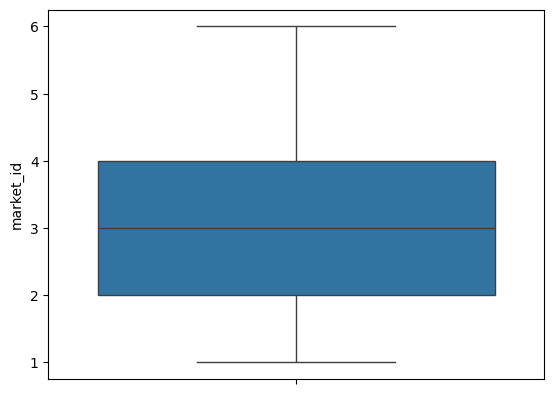

In [20]:
sns.boxplot(df["market_id"])

In [21]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


## *Creating a target variable* 

In [22]:
df["actual_time_for_delivery"] = df["actual_delivery_time"] - df["created_at"]
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_for_delivery
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:04
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,0 days 00:29:41
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,0 days 00:51:15
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,0 days 00:39:50


In [23]:
df["actual_time_for_delivery"] = df["actual_time_for_delivery"].dt.total_seconds()
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_for_delivery
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0,1781.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0,3075.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0,2390.0


In [24]:
# plt.scatter(x=df["actual_time_for_delivery"],y=df["total_onshift_dashers"])

In [25]:
# sns.histplot(df["actual_time_for_delivery"])

<Axes: ylabel='actual_time_for_delivery'>

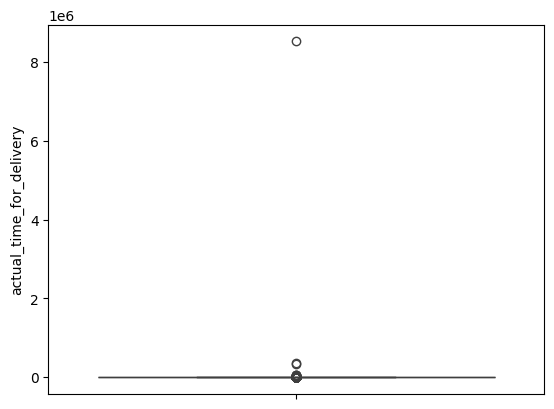

In [26]:
sns.boxplot(df['actual_time_for_delivery'])

In [27]:
print("mean : " ,df["actual_time_for_delivery"].mean())
print("median", df["actual_time_for_delivery"].median())

mean :  2908.25737383561
median 2660.0


In [28]:
time_mean_outlier = df["actual_time_for_delivery"].mean() + 3 * df["actual_time_for_delivery"].std()
time_median_outliler = df["actual_time_for_delivery"].median() + 3 * df["actual_time_for_delivery"].std()
print("mean" , time_mean_outlier)
print("median" ,time_median_outliler )

mean 60597.08420963336
median 60348.82683579775


In [29]:
mean_outlier_len = len(df[df["actual_time_for_delivery"] > time_mean_outlier])
median_outlier_len = len(df[df["actual_time_for_delivery"] > time_median_outliler])
print("mean" , mean_outlier_len)
print("median" ,median_outlier_len )

mean 3
median 3


In [30]:
actual_time_outlier = df[df["actual_time_for_delivery"] > time_mean_outlier].index
actual_time_outlier

Index([2690, 27189, 185550], dtype='int64')

In [31]:
df[df["actual_time_for_delivery"] > time_median_outliler].index

Index([2690, 27189, 185550], dtype='int64')

## Additional

In [37]:
df.describe(include='all')

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_for_delivery
count,196441.000000,197428,197421,197428.000000,192668,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000,1.974210e+05
unique,NaN,NaN,NaN,NaN,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,american,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,19399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.978706,2015-02-04 22:00:09.537962752,2015-02-04 22:48:23.348914432,3530.510272,NaN,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935,2.908257e+03
min,1.000000,2014-10-19 05:24:15,2015-01-21 15:58:11,1.000000,NaN,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000,1.010000e+02
25%,2.000000,2015-01-29 02:32:42,2015-01-29 03:22:29,1686.000000,NaN,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000,2.104000e+03
50%,3.000000,2015-02-05 03:29:09.500000,2015-02-05 04:40:41,3592.000000,NaN,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000,2.660000e+03
75%,4.000000,2015-02-12 01:39:18.500000,2015-02-12 02:25:26,5299.000000,NaN,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000,3.381000e+03
max,6.000000,2015-02-18 06:00:44,2015-02-19 22:45:31,6987.000000,NaN,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000,8.516859e+06


In [40]:
num_cols = df.dtypes[df.dtypes != 'object'].index
num_cols

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'actual_time_for_delivery'],
      dtype='object')

In [45]:
cor_df = df[num_cols].corr()
cor_df["actual_time_for_delivery"].sort_values(ascending=False)

actual_time_for_delivery                        1.000000
total_outstanding_orders                        0.122294
total_busy_dashers                              0.060641
total_onshift_dashers                           0.046972
estimated_store_to_consumer_driving_duration    0.012198
subtotal                                        0.011200
max_item_price                                  0.009409
estimated_order_place_duration                  0.009200
num_distinct_items                              0.006741
total_items                                     0.004905
min_item_price                                  0.004762
store_id                                       -0.000414
actual_delivery_time                           -0.000602
market_id                                      -0.005784
order_protocol                                 -0.006660
created_at                                     -0.028321
Name: actual_time_for_delivery, dtype: float64

In [69]:
corr_vals = cor_df["actual_time_for_delivery"].sort_values(ascending=False)

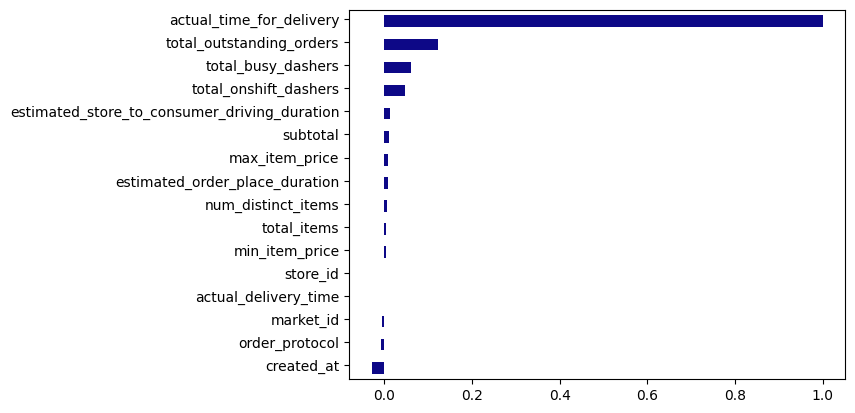

In [98]:
corr_vals.plot(kind='barh',colormap='plasma',position=0.3).invert_yaxis()

actual_time_for_delivery                        1.000000
total_outstanding_orders                        0.122294
total_busy_dashers                              0.060641
total_onshift_dashers                           0.046972
estimated_store_to_consumer_driving_duration    0.012198
subtotal                                        0.011200
max_item_price                                  0.009409
estimated_order_place_duration                  0.009200
num_distinct_items                              0.006741
total_items                                     0.004905
min_item_price                                  0.004762
store_id                                       -0.000414
actual_delivery_time                           -0.000602
market_id                                      -0.005784
order_protocol                                 -0.006660
created_at                                     -0.028321
Name: actual_time_for_delivery, dtype: float64

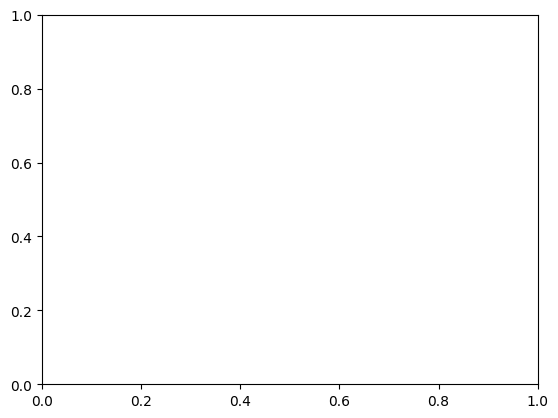

In [80]:
fig , ax = plt.subplots()
cor_df["actual_time_for_delivery"].sort_values(ascending=False)


In [ ]:
dfas

In [ ]:
df.drop(actual_time_outlier,inplace=True)

<Axes: xlabel='actual_time_for_delivery', ylabel='Count'>

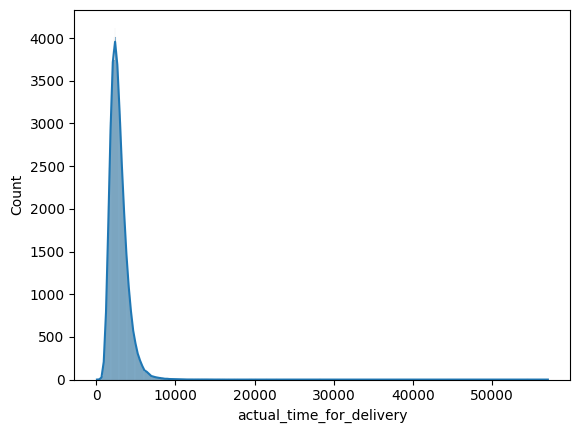

In [ ]:
sns.histplot(df["actual_time_for_delivery"],kde=True)

<Axes: ylabel='actual_time_for_delivery'>

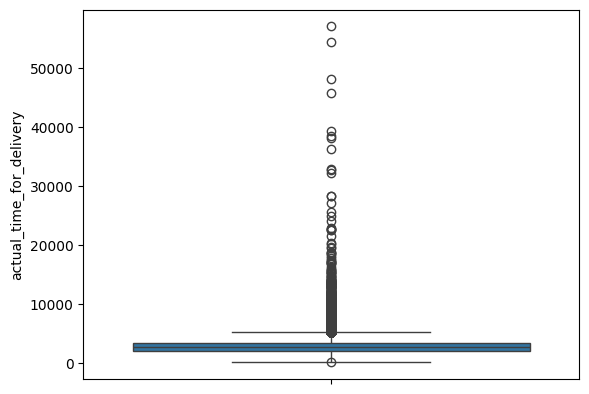

In [ ]:
sns.boxplot(df["actual_time_for_delivery"])

# QQ PLOT

In [ ]:
import scipy.stats as stat 
import pylab 

In [ ]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'actual_time_for_delivery'],
      dtype='object')

((array([-4.49302462, -4.30045971, -4.19593493, ...,  4.19593493,
          4.30045971,  4.49302462]),
  array([101., 223., 297., ...,  nan,  nan,  nan])),
 (nan, nan, nan))

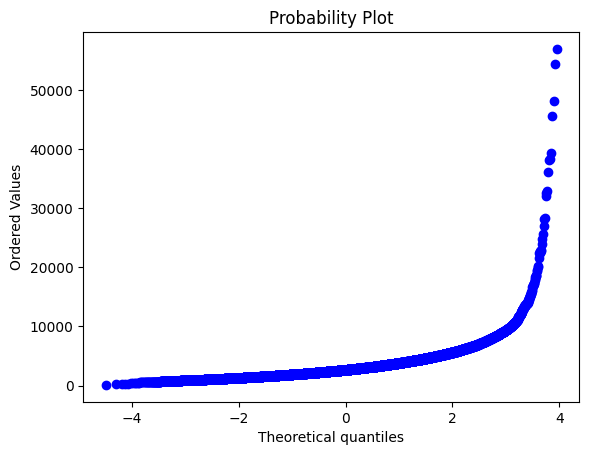

In [ ]:
stat.probplot(df["actual_time_for_delivery"],dist='norm',plot=pylab)

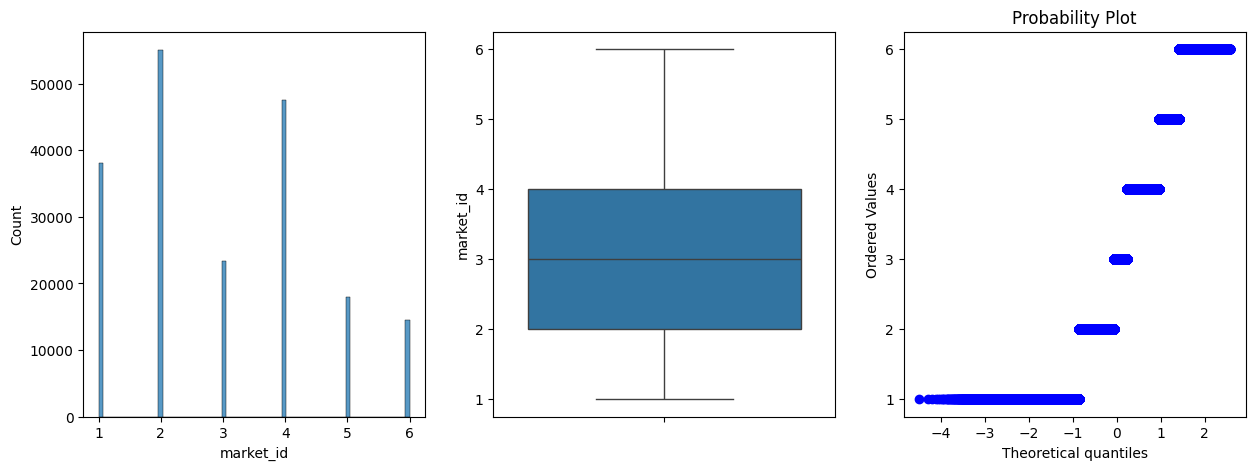

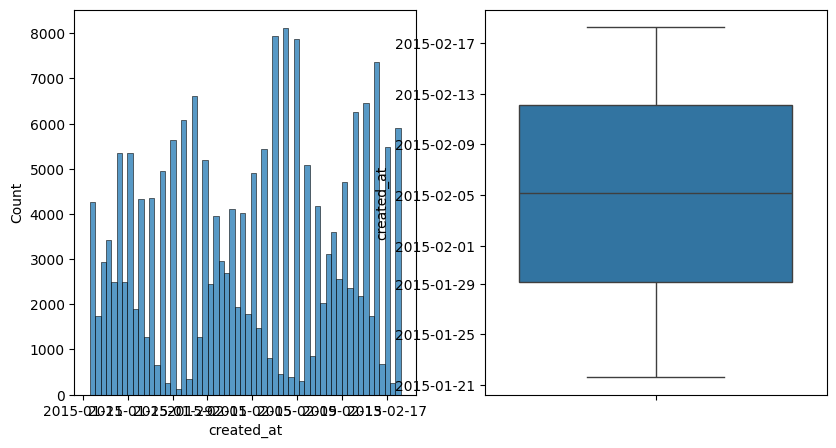

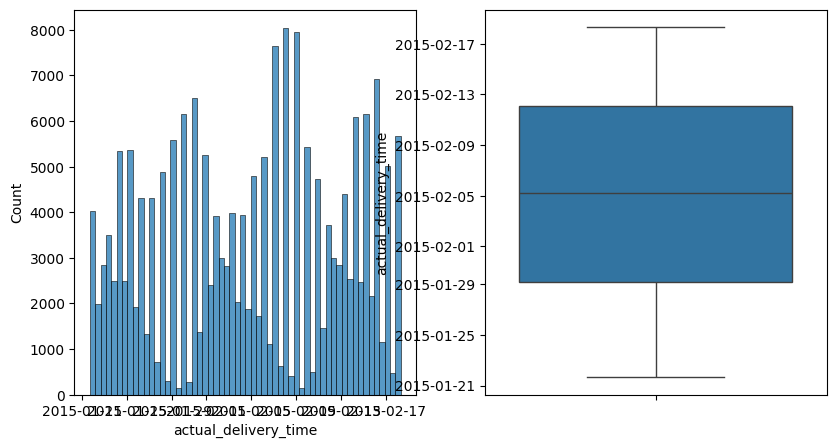

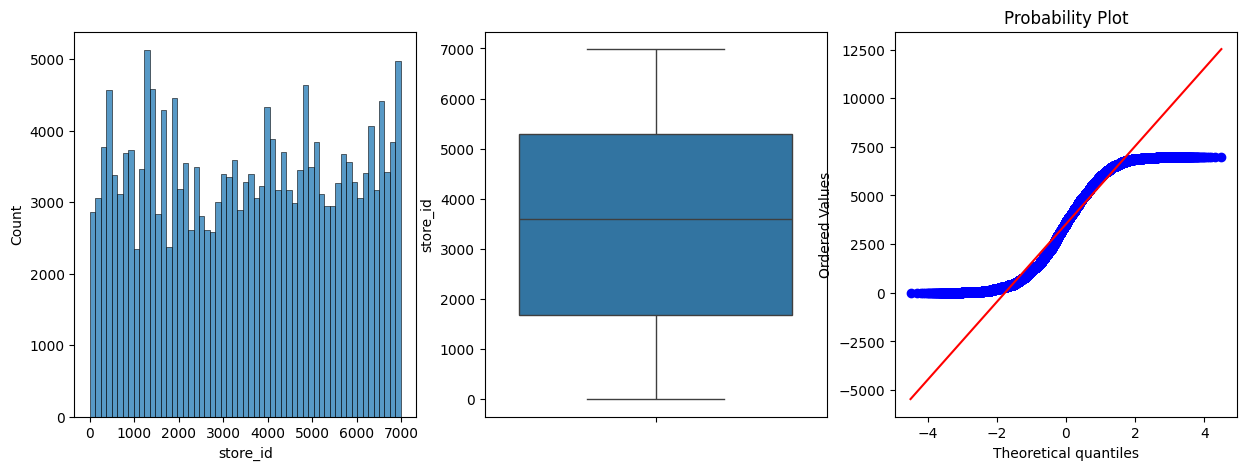

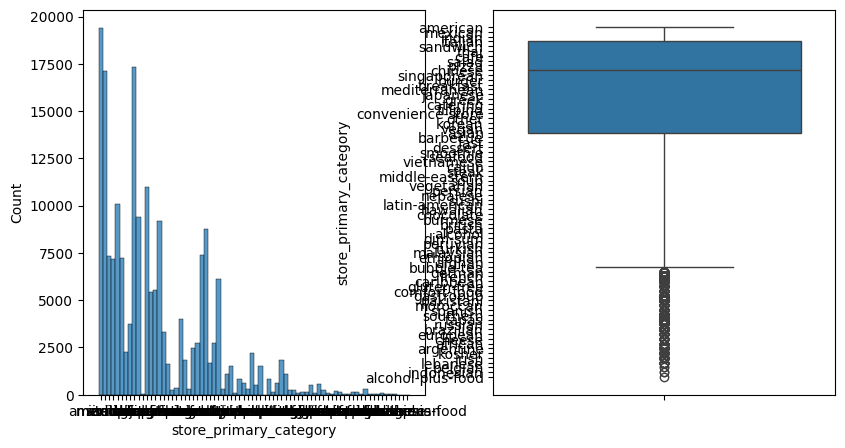

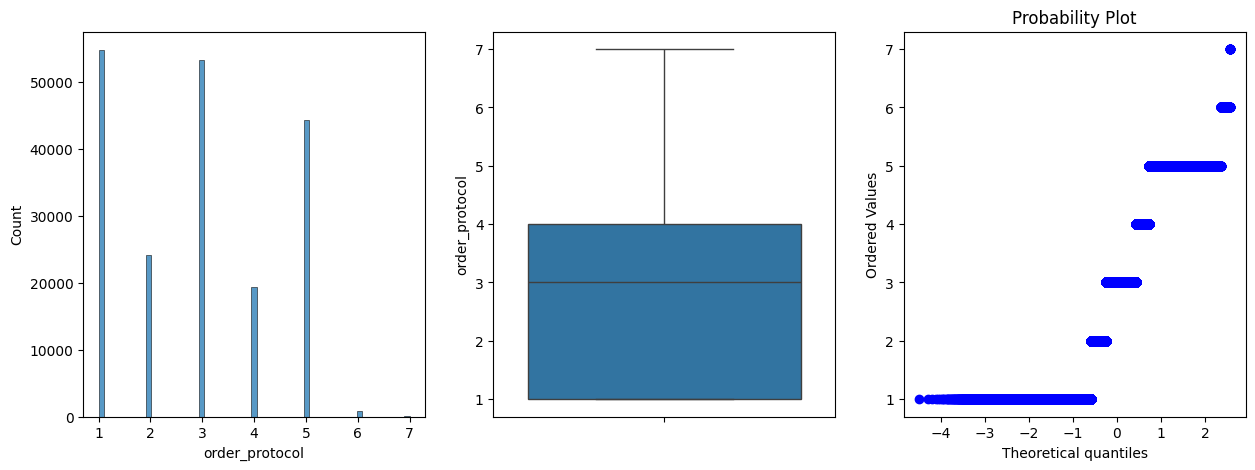

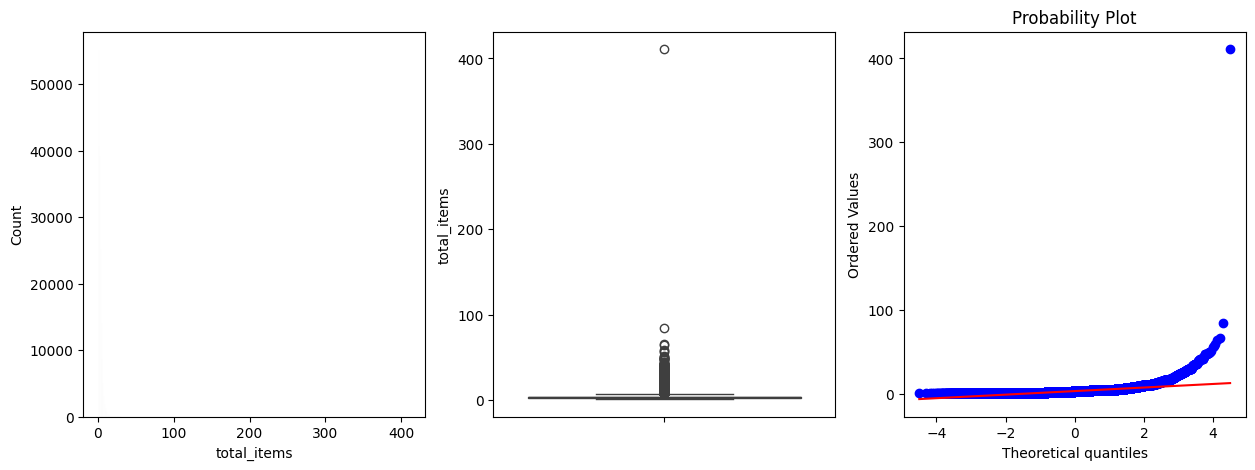

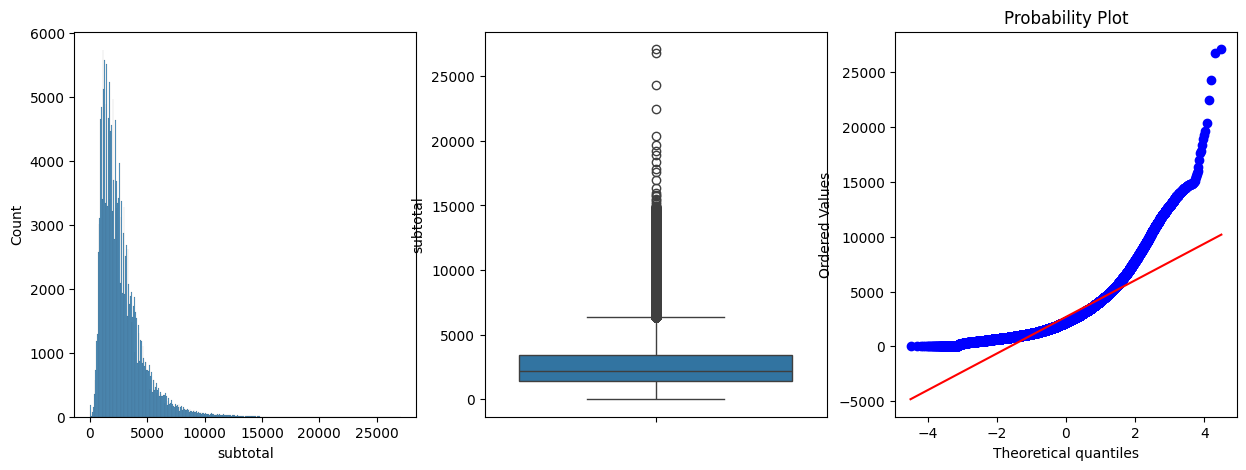

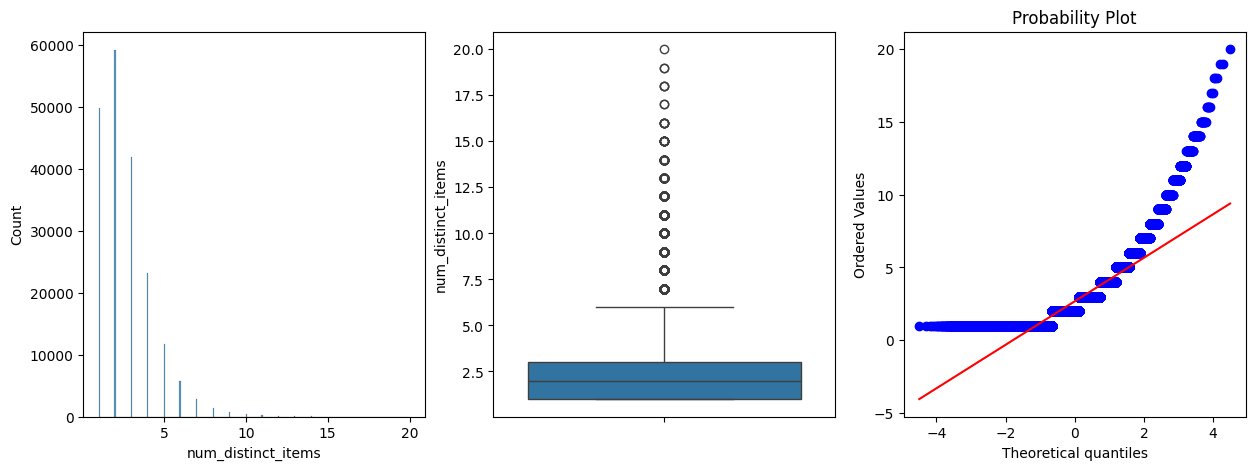

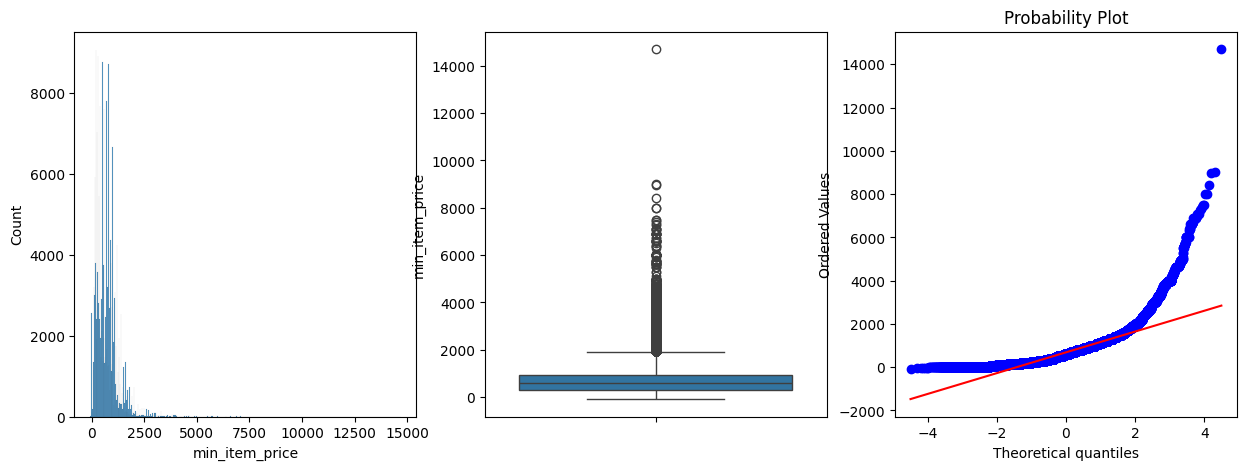

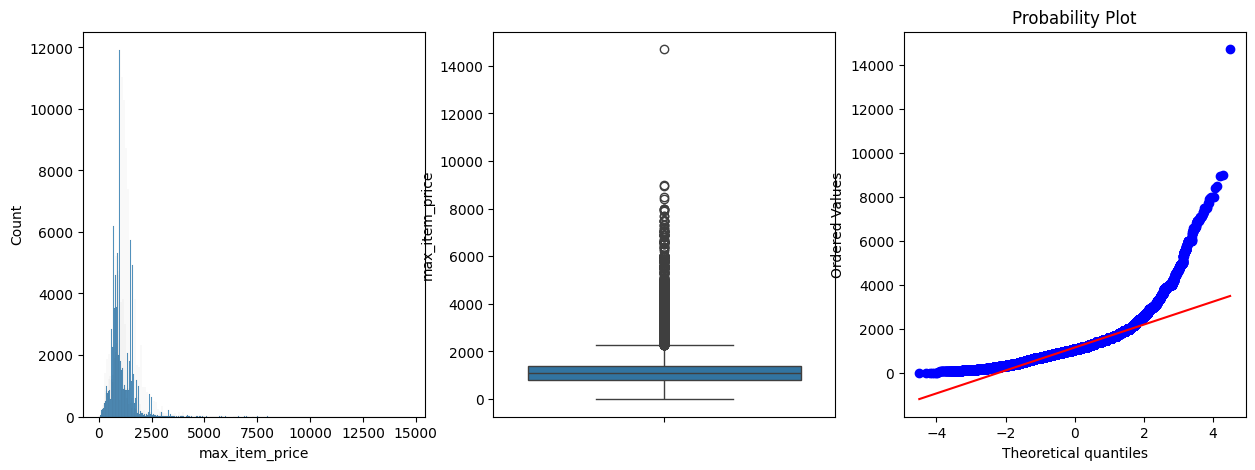

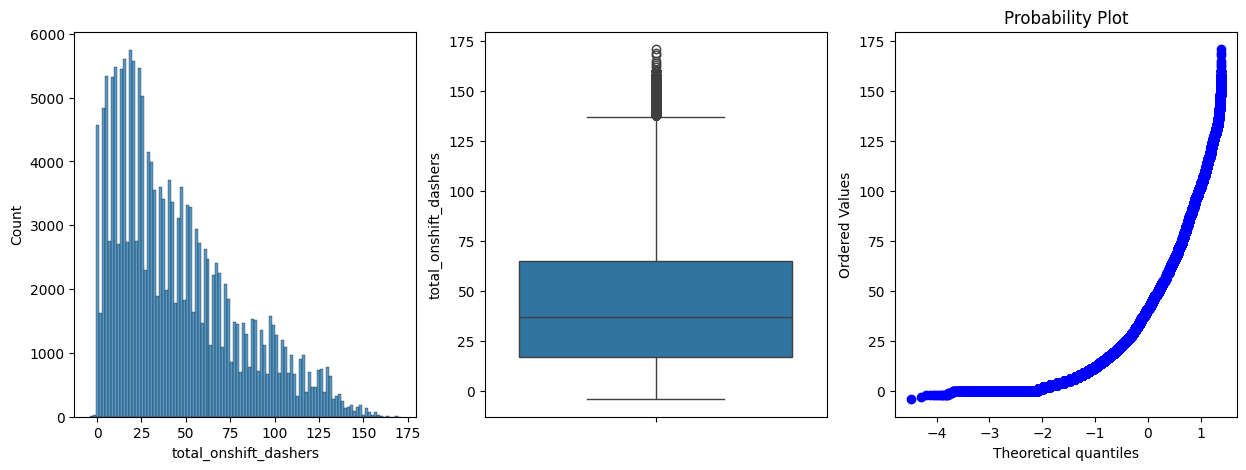

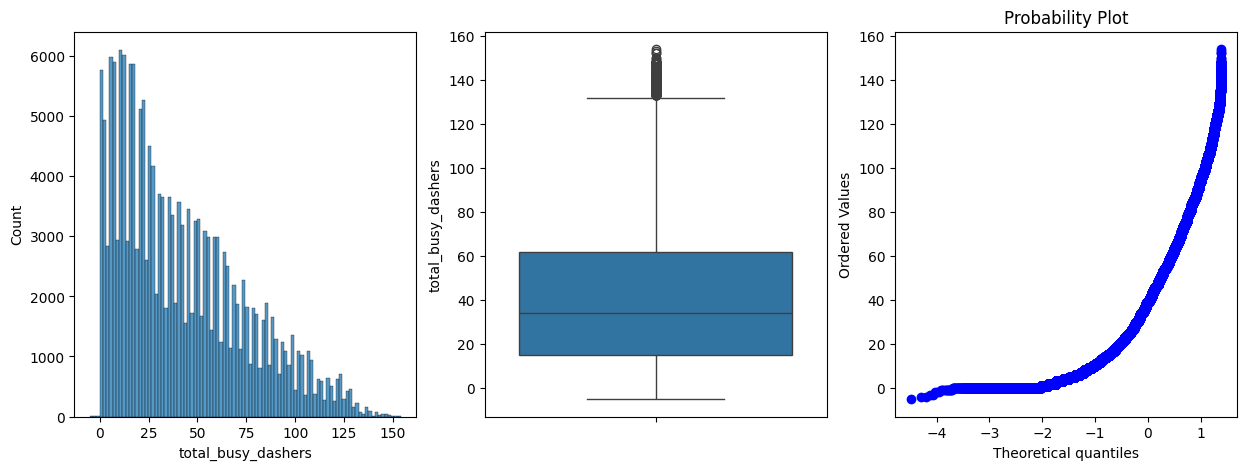

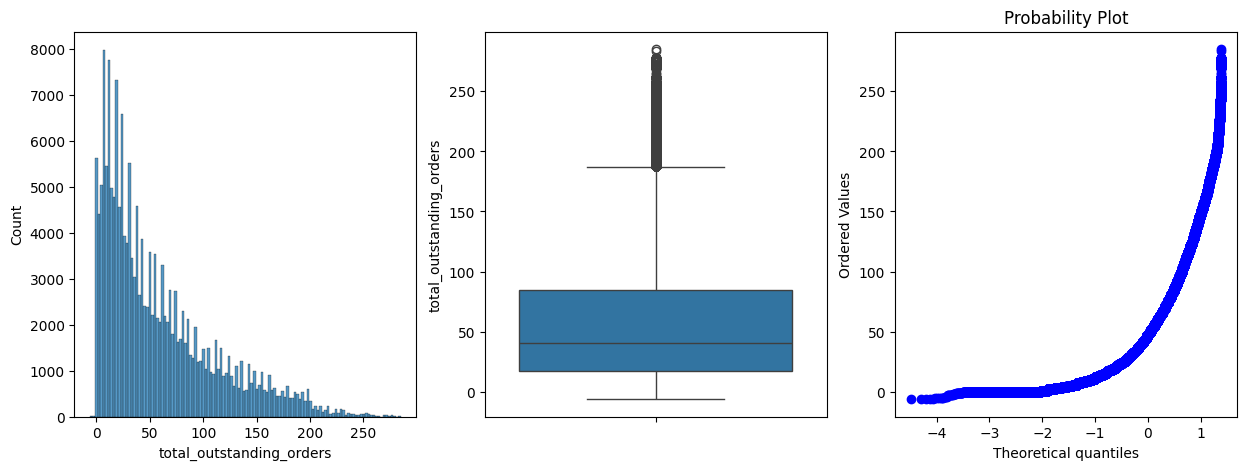

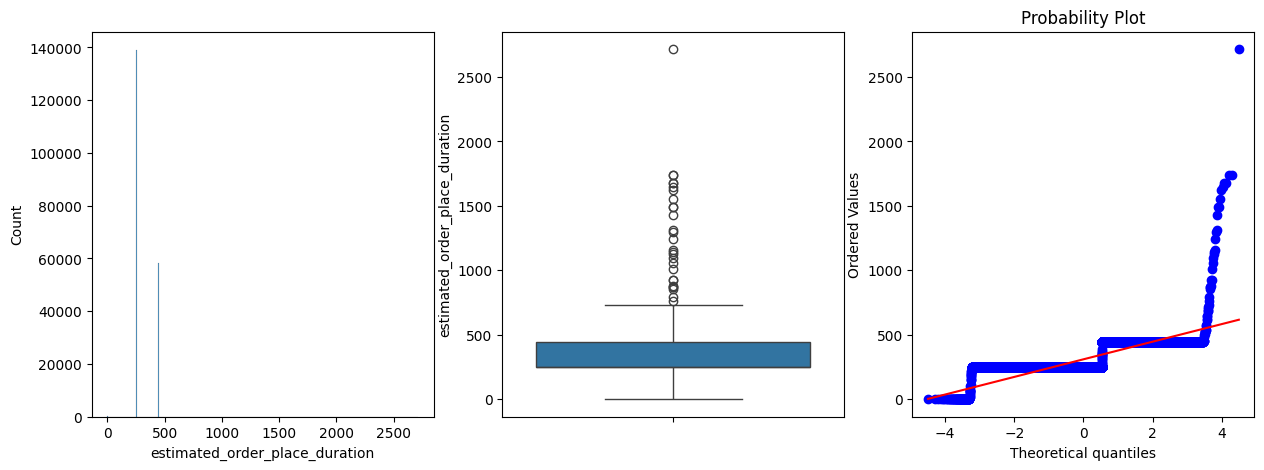

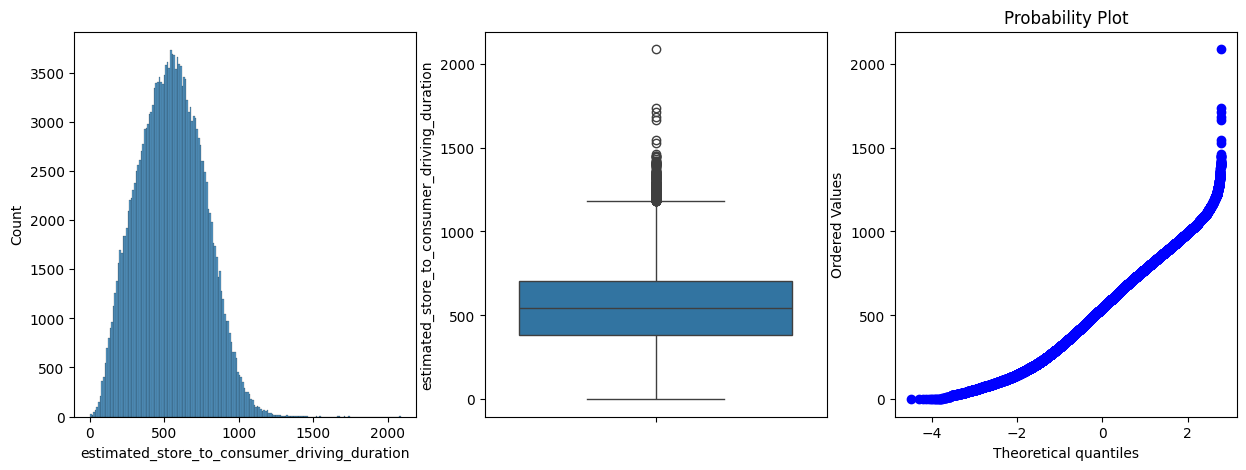

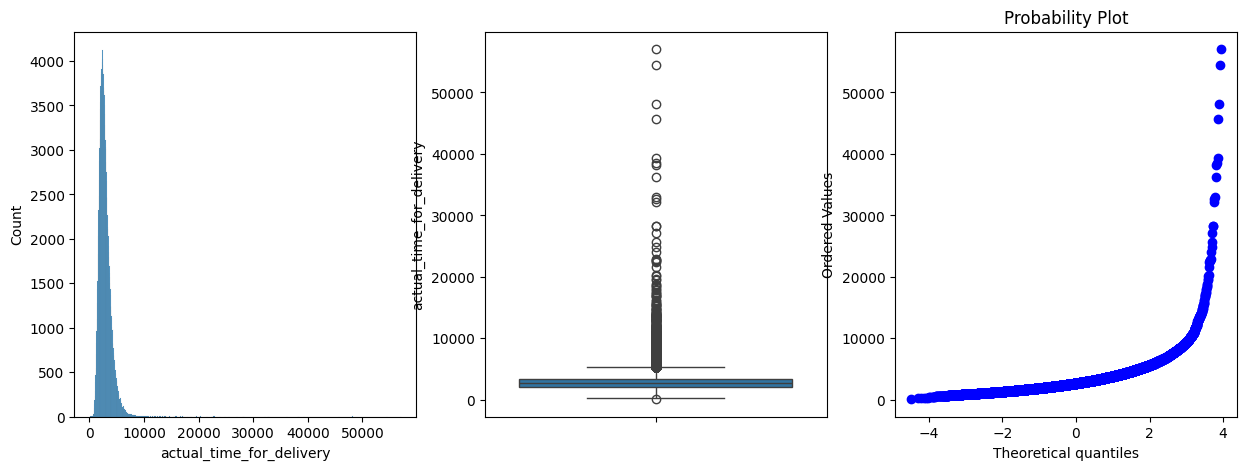

In [ ]:
for key,val in df.items():    
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.histplot(df[key])
    plt.subplot(1,3,2)
    sns.boxplot(df[key])
    if pd.api.types.is_numeric_dtype(val):
        plt.subplot(1,3,3)
        stat.probplot(df[key],plot=pylab)


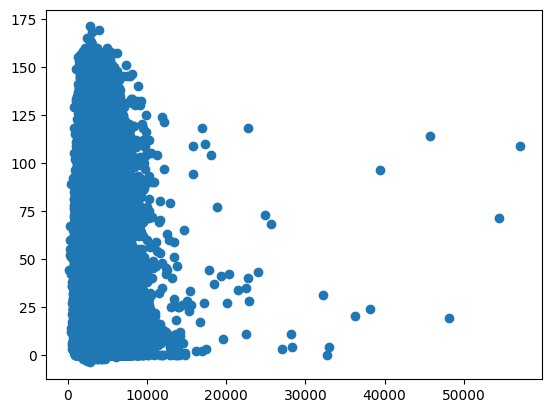

In [ ]:
plt.scatter(x=df["actual_time_for_delivery"],y=df["total_onshift_dashers"])

In [ ]:
print("mean",df["total_onshift_dashers"].mean())
print("median", df["total_onshift_dashers"].median())

mean 44.80819036894747
median 37.0


In [ ]:
dasher_higher_val = df["total_onshift_dashers"].mean() + 3 * df["total_onshift_dashers"].std()
dasher_higher_val

148.388453754247

In [ ]:
df[df["total_onshift_dashers"] > dasher_higher_val]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_for_delivery
872,2.0,2015-02-14 03:05:40,2015-02-14 04:15:01,1904,sandwich,2.0,2,1695,2,300,795,149.0,138.0,247.0,251,639.0,4161.0
1119,2.0,2015-02-14 03:09:18,2015-02-14 03:50:02,1904,sandwich,2.0,3,2190,3,300,1195,149.0,138.0,247.0,251,593.0,2444.0
1679,2.0,2015-02-07 02:45:20,2015-02-07 03:25:44,5003,chinese,1.0,4,3460,4,595,1275,152.0,131.0,211.0,446,485.0,2424.0
2610,2.0,2015-02-07 03:15:15,2015-02-07 04:11:25,2731,japanese,1.0,2,1590,2,395,1195,150.0,126.0,229.0,446,316.0,3370.0
3328,2.0,2015-02-06 02:27:12,2015-02-06 03:00:02,2851,american,1.0,1,949,1,949,949,155.0,76.0,114.0,446,311.0,1970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195962,2.0,2015-02-07 02:29:29,2015-02-07 03:22:37,4862,sandwich,5.0,3,2997,3,999,999,149.0,118.0,209.0,251,705.0,3188.0
195971,2.0,2015-02-07 02:57:05,2015-02-07 03:36:47,4862,sandwich,5.0,4,2261,3,100,999,156.0,137.0,215.0,251,764.0,2382.0
196128,2.0,2015-02-07 02:31:28,2015-02-07 03:15:44,4862,sandwich,5.0,2,2301,2,999,999,151.0,114.0,195.0,251,833.0,2656.0
196180,2.0,2015-02-07 02:58:55,2015-02-07 03:42:06,4862,sandwich,5.0,4,2700,3,295,1111,156.0,137.0,215.0,251,378.0,2591.0


In [ ]:
dasher_df = df.groupby(["total_onshift_dashers","total_busy_dashers","actual_time_for_delivery"]).size()
dasher_df

total_onshift_dashers  total_busy_dashers  actual_time_for_delivery
-4.0                    7.0                2835.0                      1
-3.0                    0.0                2437.0                      1
-2.0                   -1.0                4703.0                      1
                        1.0                4153.0                      1
                        2.0                2368.0                      1
                                                                      ..
 164.0                  86.0               2782.0                      1
 165.0                  97.0               2397.0                      1
 168.0                  131.0              3016.0                      1
 169.0                  134.0              3884.0                      1
 171.0                  91.0               2789.0                      1
Length: 175134, dtype: int64

In [ ]:
pd.DataFrame(dasher_df)[:20]

0
total_onshift_dashers total_busy_dashers actual_time_for_delivery   
-4.0                   7.0               2835.0                    1
-3.0                   0.0               2437.0                    1
-2.0                  -1.0               4703.0                    1
                       1.0               4153.0                    1
                       2.0               2368.0                    1
                                         4275.0                    1
                       3.0               1912.0                    1
                                         3643.0                    1
                       4.0               3844.0                    1
                       5.0               2311.0                    1
                                         2596.0                    1
                       6.0               2905.0                    1
                                         3376.0                    1
                       8.0               3116.0                    1
                       12.0              2586.0                    1
-1.0                   4.0               2796.0                    1
                       5.0               3209.0                    1
                       6.0               2956.0                    1
                       7.0               2617.0                    1
                       9.0               3041.0                    1

In [ ]:
df[df["total_onshift_dashers"] < 0]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,actual_time_for_delivery
6034,3.0,2015-02-14 01:48:58,2015-02-14 03:00:13,90,american,1.0,2,3538,2,1238,1606,-2.0,2.0,10.0,446,266.0,4275.0
12888,3.0,2015-01-21 21:02:32,2015-01-21 21:41:03,2649,catering,2.0,1,986,1,892,827,-2.0,5.0,1.0,251,787.0,2311.0
26395,3.0,2015-02-08 18:28:15,2015-02-08 19:17:31,2772,fast,3.0,2,1327,1,680,615,-1.0,6.0,6.0,251,368.0,2956.0
30897,3.0,2015-02-07 19:55:46,2015-02-07 20:46:27,793,hawaiian,1.0,1,1202,1,987,1092,-1.0,9.0,5.0,446,773.0,3041.0
33154,1.0,2015-02-02 22:27:36,2015-02-03 00:08:43,1337,american,1.0,2,2831,2,681,635,-1.0,13.0,16.0,446,394.0,6067.0
53702,1.0,2015-01-25 02:55:01,2015-01-25 03:41:37,1238,chinese,1.0,2,1803,2,818,1061,-1.0,4.0,7.0,446,381.0,2796.0
60282,1.0,2015-01-29 02:07:49,2015-01-29 02:48:26,4402,salad,5.0,2,1117,2,339,956,-3.0,0.0,16.0,251,187.0,2437.0
61131,1.0,2015-02-01 03:42:22,2015-02-01 04:34:18,6379,sushi,5.0,7,2666,7,379,437,-2.0,8.0,5.0,251,486.0,3116.0
118311,1.0,2015-02-09 03:35:22,2015-02-09 04:36:05,2194,japanese,3.0,2,1862,2,488,1162,-2.0,3.0,3.0,251,603.0,3643.0
119242,3.0,2015-02-14 04:21:45,2015-02-14 05:40:08,4671,seafood,4.0,4,1874,3,110,1378,-2.0,-1.0,11.0,446,971.0,4703.0
